In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""
改变量：
外径R：50~450
内径r：0~R
开口角度θ：0~360
旋转角度φ：0~360
周期Px：2R~2R+300
周期Py：2R~2R+300
"""

'\n改变量：\n外径R：50~450\n内径r：0~R\n开口角度θ：0~360\n旋转角度φ：0~360\n周期Px：2R~2R+300\n周期Py：2R~2R+300\n'

In [3]:
import pandas as pd
import random

# Set the random seed for reproducibility
random.seed(42)

# Number of data points
num_data_points = 6000000


# Number of segments for each variable
num_segments = 10

# Define the ranges for each parameter
R_range = (50, 450)
r_range = (0, 400)
theta_range = (0, 360)
phi_range = (0, 360)
px_range = (200, 900)
py_range = (200, 900)

# Generate random data
data = {
    'R': [],
    'r': [],
    'theta': [],
    'phi': [],
    'Px': [],
    'Py': [],
}

# Generate remaining random data
for _ in range(num_data_points):
    data['R'].append(random.randint(*R_range))
    data['r'].append(random.randint(*r_range))
    data["theta"].append(random.randint(*theta_range))
    data['phi'].append(random.randint(*phi_range))
    data['Px'].append(random.randint(*px_range))
    data['Py'].append(random.randint(*py_range))


# Create a DataFrame
df = pd.DataFrame(data)



In [4]:
df

,R,r,theta,phi,Px,Py
0,377,57,12,140,450,428
1,121,377,52,346,758,289
2,352,216,16,15,295,423
3,169,258,308,13,774,403
4,416,332,359,279,629,425
...,...,...,...,...,...,...
5999995,96,357,126,355,565,637
5999996,214,389,83,40,442,766
5999997,307,135,222,293,365,377
5999998,184,22,269,168,780,728


In [5]:
import pandas as pd
import numpy as np


def filter_data(df):
    """
    过滤数据的函数。

    参数：
    df (DataFrame): 包含原始数据的DataFrame。

    返回：
    DataFrame: 过滤后的DataFrame。
    """
    # 定义过滤条件
    def condition1(df):
        return df['r'] < df['R'] 

    def condition2(df):
        return (df['Px']<=df['R']*2 + 300)  & ((df['R'] * 2) <= df['Px'])
    
    def condition3(df):
        return (df['Py']<=df['R']*2 + 300)  & ((df['R'] * 2) <= df['Py'])

    # 使用逻辑与连接所有过滤条件
    combined_condition = pd.Series(True, index=df.index)
    for condition in [condition1,condition2,condition3]:
        combined_condition = combined_condition & condition(df)

    # 根据过滤条件进行筛选
    filtered_df = df[combined_condition]

    return filtered_df

# 读取数据
# df = pd.read_csv('random_data_with_segments.csv')

# 使用函数过滤数据
filtered_df = filter_data(df)

# 打印过滤前后的数据数量
print(f"过滤前的数据数量: {len(df)}")
print(f"过滤后的数据数量: {len(filtered_df)}")

# 如果需要保存过滤后的数据，可以使用以下代码
# filtered_df.to_csv('filtered_data.csv', index=False)


过滤前的数据数量: 6000000
过滤后的数据数量: 410009


In [6]:
filtered_df

,R,r,theta,phi,Px,Py
25,333,5,348,58,898,749
45,100,31,206,173,311,454
78,133,90,211,12,383,540
98,387,43,145,263,879,848
113,262,208,169,277,677,625
...,...,...,...,...,...,...
5999918,348,196,176,159,741,832
5999931,329,320,299,288,862,785
5999946,359,148,89,249,789,829
5999953,137,46,274,320,385,439


In [7]:
### 从filtered_df drop掉50000个r<100的数据
data_36W = filtered_df.drop(filtered_df[filtered_df['r']<100].sample(n=30009).index)
data_36W = data_36W.drop(data_36W[data_36W['r']<50].sample(n=10000).index)
data_36W = data_36W.drop(data_36W[data_36W['r']<25].sample(n=10000).index)
data_36W = data_36W.drop(data_36W[data_36W['r']<15].sample(n=10000).index)

In [8]:
data_36W

,R,r,theta,phi,Px,Py
45,100,31,206,173,311,454
78,133,90,211,12,383,540
98,387,43,145,263,879,848
113,262,208,169,277,677,625
120,323,13,201,303,777,878
...,...,...,...,...,...,...
5999918,348,196,176,159,741,832
5999931,329,320,299,288,862,785
5999946,359,148,89,249,789,829
5999953,137,46,274,320,385,439


array([[<Axes: title={'center': 'R'}>, <Axes: title={'center': 'r'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'phi'}>],
       [<Axes: title={'center': 'Px'}>, <Axes: title={'center': 'Py'}>]],
      dtype=object)

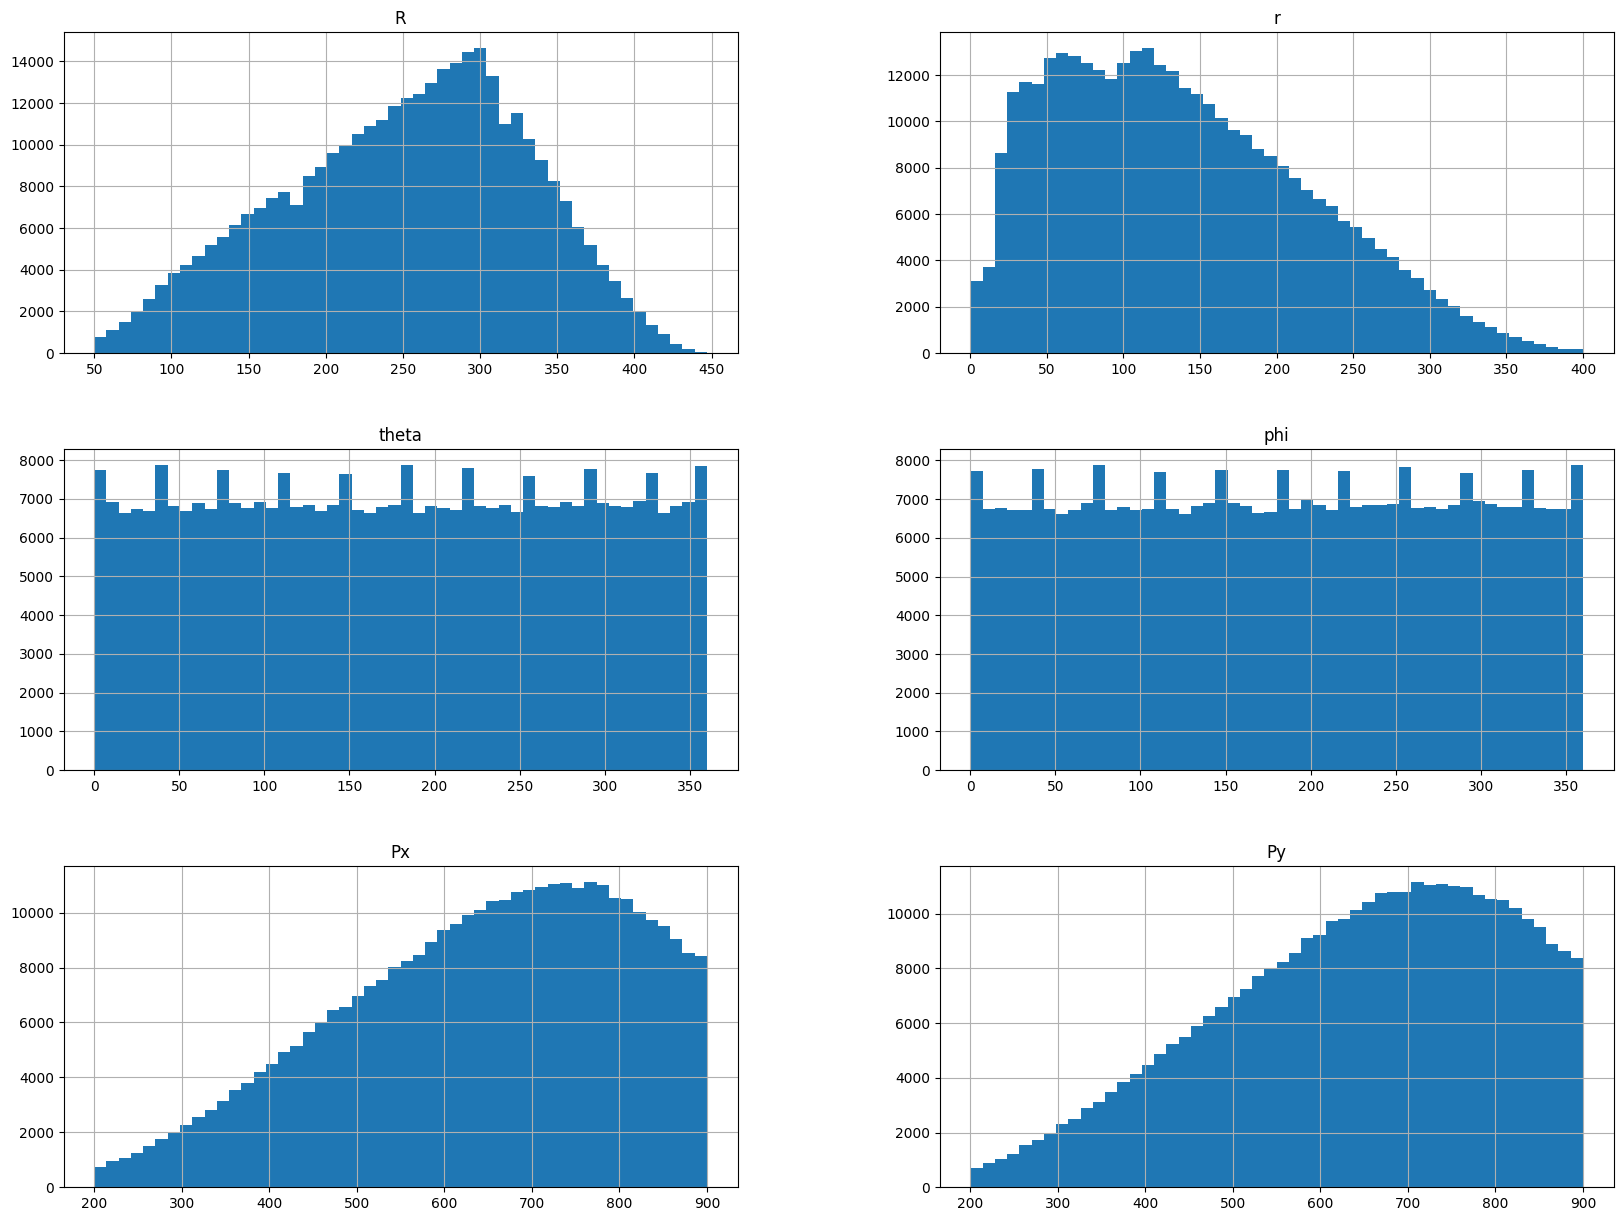

In [9]:
data_36W.hist(bins=50, figsize=(20, 15))

In [11]:
data_36W.insert(0, 'Pic', None)
data_36W.insert(0, 'type', "ring")

ValueError: cannot insert Pic, already exists

In [12]:
data_36W

,type,Pic,R,r,theta,phi,Px,Py
45,ring,None,100,31,206,173,311,454
78,ring,None,133,90,211,12,383,540
98,ring,None,387,43,145,263,879,848
113,ring,None,262,208,169,277,677,625
120,ring,None,323,13,201,303,777,878
...,...,...,...,...,...,...,...,...
5999918,ring,None,348,196,176,159,741,832
5999931,ring,None,329,320,299,288,862,785
5999946,ring,None,359,148,89,249,789,829
5999953,ring,None,137,46,274,320,385,439


In [13]:
# 将索引重置为从0开始的连续整数
data_36W.reset_index(drop=True, inplace=True)
data_36W

,type,Pic,R,r,theta,phi,Px,Py
0,ring,None,100,31,206,173,311,454
1,ring,None,133,90,211,12,383,540
2,ring,None,387,43,145,263,879,848
3,ring,None,262,208,169,277,677,625
4,ring,None,323,13,201,303,777,878
...,...,...,...,...,...,...,...,...
349995,ring,None,348,196,176,159,741,832
349996,ring,None,329,320,299,288,862,785
349997,ring,None,359,148,89,249,789,829
349998,ring,None,137,46,274,320,385,439


In [15]:
from tqdm import tqdm
for i in tqdm(range(len(data_36W))):
    R = data_36W.iloc[i]['R']
    r = data_36W.iloc[i]['r']
    Px = data_36W.iloc[i]['Px']
    Py = data_36W.iloc[i]['Py']
    theta = data_36W.iloc[i]['theta']
    phi = data_36W.iloc[i]['phi']
    pic_name = f'R={R}=r={r}=theta={theta}=phi={phi}=Px={Px}=Py={Py}.png'
    data_36W.loc[i,"Pic"] = pic_name

100%|██████████| 350000/350000 [01:07<00:00, 5171.14it/s]


In [16]:
data_36W

,type,Pic,R,r,theta,phi,Px,Py
0,ring,R=100=r=31=theta=206=phi=173=Px=311=Py=454.png,100,31,206,173,311,454
1,ring,R=133=r=90=theta=211=phi=12=Px=383=Py=540.png,133,90,211,12,383,540
2,ring,R=387=r=43=theta=145=phi=263=Px=879=Py=848.png,387,43,145,263,879,848
3,ring,R=262=r=208=theta=169=phi=277=Px=677=Py=625.png,262,208,169,277,677,625
4,ring,R=323=r=13=theta=201=phi=303=Px=777=Py=878.png,323,13,201,303,777,878
...,...,...,...,...,...,...,...,...
349995,ring,R=348=r=196=theta=176=phi=159=Px=741=Py=832.png,348,196,176,159,741,832
349996,ring,R=329=r=320=theta=299=phi=288=Px=862=Py=785.png,329,320,299,288,862,785
349997,ring,R=359=r=148=theta=89=phi=249=Px=789=Py=829.png,359,148,89,249,789,829
349998,ring,R=137=r=46=theta=274=phi=320=Px=385=Py=439.png,137,46,274,320,385,439


In [17]:
data_36W.to_csv('ring_35w.csv', index=False)